In [32]:
from matplotlib import pyplot
import numpy as np

#Choisir ici la séquence à tester
nom_fichier = "sequence_QRGN_ANU.txt"

fichier = open(nom_fichier, "r")
sequence = fichier.read()
fichier.close()

In [33]:
""" Calcul de la fréquence de 0 et de 1 """

nb_1 = 0
for bit in sequence:
    if bit == '1':
        nb_1 += 1

r_1=(nb_1/len(sequence))*100
print("Proportion of 1:",r_1, "%")

Proportion of 1: 57.07716532507165 %


In [34]:
""" Calcul de la probabilité de changement """

i = 0
nb_change = 0
for i in range(len(sequence)-1):
    if sequence[i] != sequence[i+1]:
        nb_change += 1

prob = nb_change/len(sequence)
print(prob)

0.5006990538387578


1.9971891611083796


Text(0, 0.5, "nombre d'occurences")

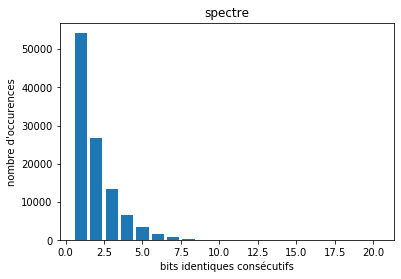

In [35]:
""" Calcul de la vitesse d'oscillation """

l_speed=[]
cpt=0
while cpt<len(sequence)-1:
    startbit=sequence[cpt]
    pos=1
    while startbit==sequence[cpt+pos]:
        pos+=1
        if cpt+pos==len(sequence):
            break
    l_speed.append(pos)
    cpt=cpt+pos

speed=sum(l_speed)/len(l_speed)
print(speed)

#Tracé
taille_suites=[]
for i in range(1,max(l_speed)+1):
    taille_suites.append(l_speed.count(i))
pyplot.bar(range(1,max(l_speed)+1),taille_suites)
pyplot.title("spectre")
pyplot.xlabel("bits identiques consécutifs")
pyplot.ylabel("nombre d'occurences")

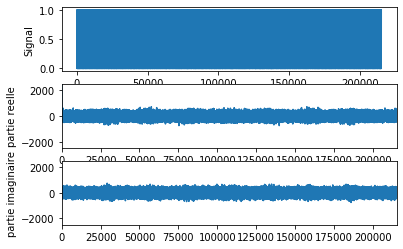

In [36]:
"""
Transformée de Fourier
"""

seq_np = np.zeros(len(sequence))
for i in range(len(sequence)):
    seq_np[i] = int(sequence[i])


# visualisation de a
pyplot.subplot(311)
pyplot.plot(seq_np)
pyplot.ylabel("Signal")

# calcul de la transformée
SEQ = np.fft.fft(seq_np)

# visualisation de SEQ
pyplot.subplot(312)
pyplot.plot(np.real(SEQ))
pyplot.axis([0, len(SEQ), -2500, 2500])
pyplot.ylabel("partie reelle")

pyplot.subplot(313)
pyplot.plot(np.imag(SEQ))
pyplot.axis([0, len(SEQ), -2500, 2500])
pyplot.ylabel("partie imaginaire")

pyplot.show()

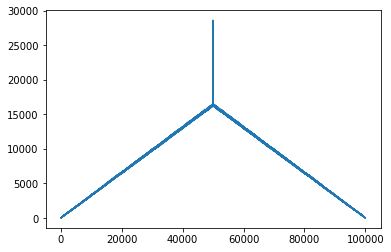

In [38]:
"""
Autocorrélation
"""

nb_bits=50000
seq_np = np.zeros(nb_bits)
for i in range(nb_bits):
    seq_np[i] = int(sequence[i])
    
result = np.correlate(seq_np, seq_np, mode='full')

pyplot.plot(result)
pyplot.show()

In [39]:
"""
Calcul de la plus grande suite de bits répétée dans la séquence et de son nombre d'apparitions

"""
nb_bits=500

test=False    
for i in range(nb_bits-1,2,-1):
    for j in range(0,nb_bits-i-1):
        for k in range(j+1,nb_bits-i):
            if sequence[j:j+i]==sequence[k:k+i]:
                seqdupliquee=sequence[j:j+i]
                test=True
                break
        if test:
            break
    if test:
        break

print(seqdupliquee)

nbre=0
for k in range(0,nb_bits-len(seqdupliquee)):
            if seqdupliquee==sequence[k:k+i]:
                nbre+=1

print(nbre)

1100011111111100
2
